<a href="https://colab.research.google.com/github/Afreed08/ML-Mini1/blob/main/YoutubeTrending.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Data Analysis on Youtube's Trending videos by importing necessary python libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
import seaborn as sns

import warnings
from collections import Counter
import datetime
import wordcloud
import json
#Importing necessary python libraries

Establishing connection with drive to read the csv file

In [2]:
from google.colab import drive
drive.mount('/content/drive')
df= pd.read_csv('/content/drive/MyDrive/USvideos.csv')

Mounted at /content/drive


In [4]:
PLOT_COLORS = ["#268bd2", "#0052CC", "#FF5722", "#b58900", "#003f5c"]
pd.options.display.float_format = '{:.2f}'.format
sns.set(style="ticks")
plt.rc('figure', figsize=(8, 5), dpi=100)
plt.rc('axes', labelpad=20, facecolor="#ffffff", linewidth=0.4, grid=True, labelsize=14)
plt.rc('patch', linewidth=0)
plt.rc('xtick.major', width=0.2)
plt.rc('ytick.major', width=0.2)
plt.rc('grid', color='#9E9E9E', linewidth=0.4)
plt.rc('font', family='Arial', weight='400', size=10)
plt.rc('text', color='#282828')
plt.rc('savefig', pad_inches=0.3, dpi=300)

#making some improvs to visualize the plots and graphs

Exploring the data

In [5]:
df['description']=df['description'].fillna(value="")

In [6]:
df.describe()

#We Observe the table and note down key points.

,category_id,views,likes,dislikes,comment_count
count,40949.00,40949.00,40949.00,40949.00,40949.00
mean,19.97,2360784.64,74266.70,3711.40,8446.80
std,7.57,7394113.76,228885.34,29029.71,37430.49
min,1.00,549.00,0.00,0.00,0.00
25%,17.00,242329.00,5424.00,202.00,614.00
50%,24.00,681861.00,18091.00,631.00,1856.00
75%,25.00,1823157.00,55417.00,1938.00,5755.00
max,43.00,225211923.00,5613827.00,1674420.00,1361580.00


Data Visualization

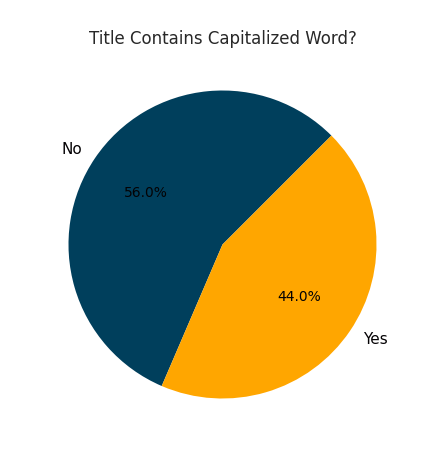

In [8]:
df["contains_capitalized"] = df["title"].str.split().apply(lambda x: any(w.isupper() for w in x))
plt.rcParams["font.family"] = "sans-serif"

counts = df["contains_capitalized"].value_counts()
plt.pie(counts, labels=['No', 'Yes'], colors=['#003f5c', '#ffa600'],
        textprops={'color': '#040204'}, startangle=45, autopct='%1.1f%%')
plt.title('Title Contains Capitalized Word?')
plt.show()


<ipython-input-9-e6d651d6430c>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  _ = sns.distplot(df["title_length"], kde=False, rug=False,


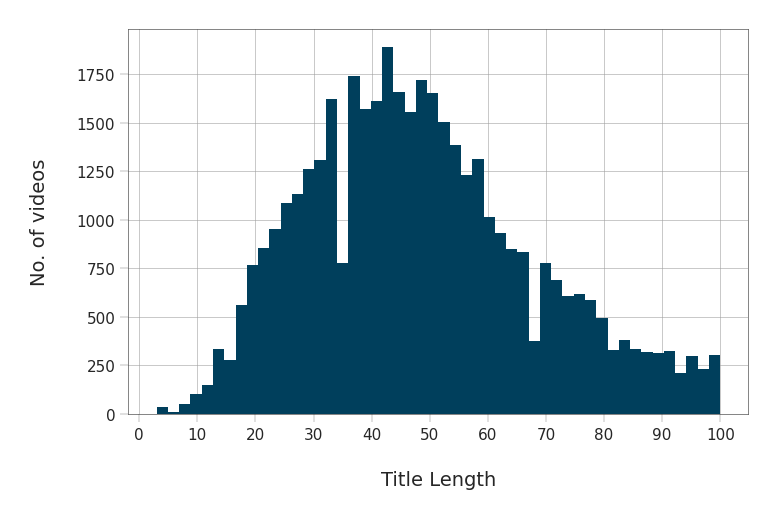

In [9]:
df["title_length"] = df["title"].apply(lambda x: len(x))

fig, ax = plt.subplots()
_ = sns.distplot(df["title_length"], kde=False, rug=False,
                 color=PLOT_COLORS[4], hist_kws={'alpha': 1}, ax=ax)
_ = ax.set(xlabel="Title Length", ylabel="No. of videos", xticks=range(0, 110, 10))

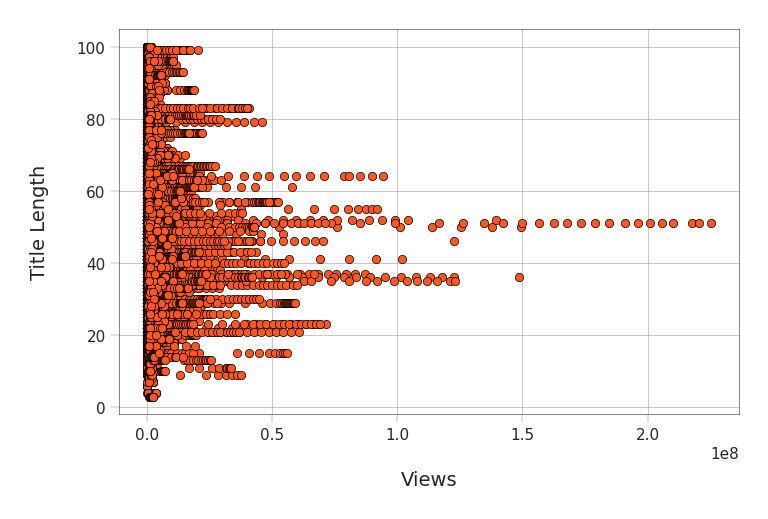

In [10]:
plt.scatter(df['views'], df['title_length'], color=PLOT_COLORS[2], edgecolors="#000", linewidths=0.5)
plt.xlabel("Views")
plt.ylabel("Title Length")
plt.show()


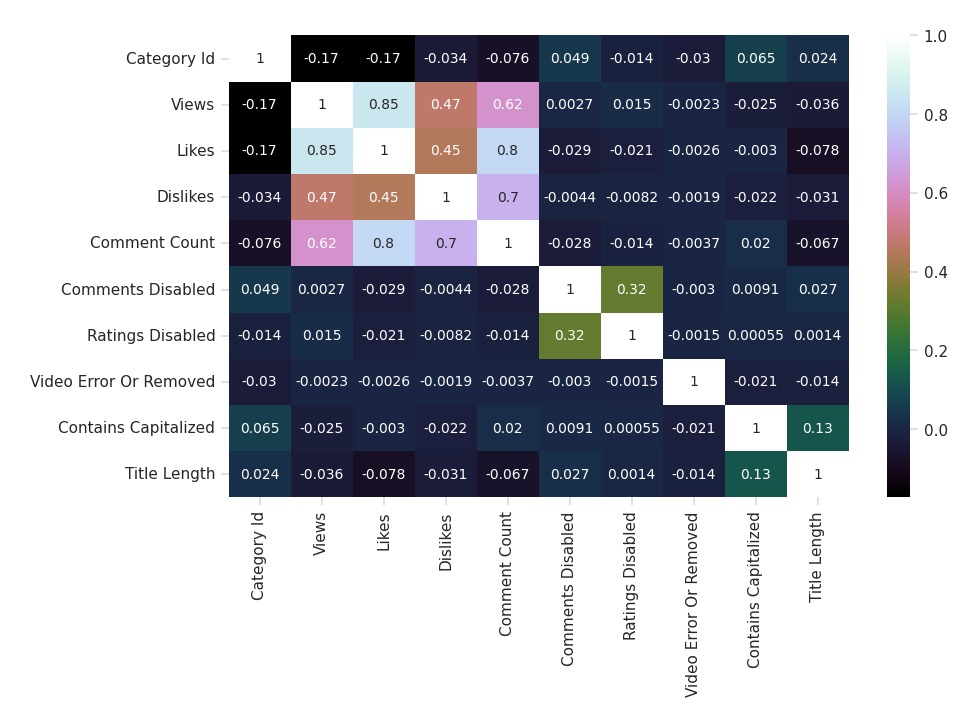

In [12]:
numeric_df = df.select_dtypes(include=['number', 'bool'])  # Keep only numeric and boolean columns
h_labels = [col.replace('_', ' ').title() for col in numeric_df.columns]

plt.figure(figsize=(10,6))
sns.heatmap(numeric_df.corr(), annot=True, xticklabels=h_labels, yticklabels=h_labels, cmap="cubehelix")
plt.show()


Creating Word Cloud

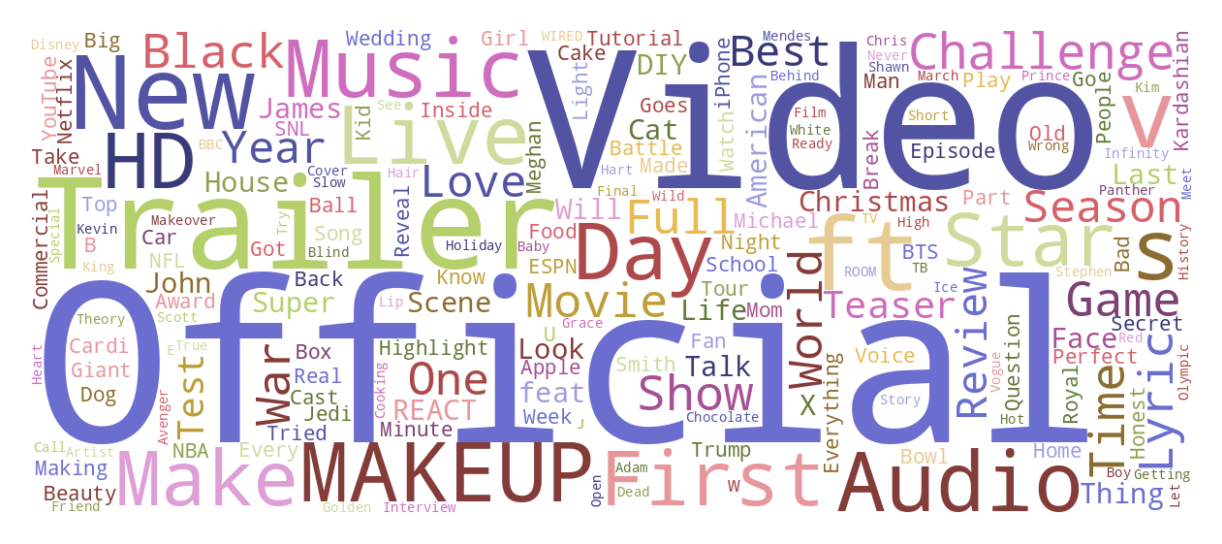

In [15]:
title_words = " ".join(df["title"].str.split().explode())  # Flatten list properly
wc = wordcloud.WordCloud(width=1200, height=500, collocations=False,
                         background_color="white", colormap="tab20b").generate(title_words)

plt.figure(figsize=(15,10))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()
